<a href="https://colab.research.google.com/github/RayYoh/EIE546_Image-Video-Processing/blob/main/EIE546_Image_Video_Processing_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Introduction to EIE546 Video Technology in Python
A Lab Session  
Speaker: Dr. WANGY Yi  
Contributor: Dr. WANG Yi, Mr. YAO Lei, Ms ZHANG Yi
>This Lab provides an introduction to basic image and video processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python. Knowledge of Python programming is not required for this workshop, but will help.  

*The source of this notebook is located at [here](https://github.com/RayYoh/EIE546-Video-Technology-in-Python/blob/main/EIE546_Image_Video_Processing.ipynb)*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*

## Image

### Step 1: Install the Dependencies
> This step installs some required libraries used in this notebook: **numpy**, **opencv-python**, **yaml**, **matplotlib**

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Opencv-python](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
* [Pyyaml](https://pyyaml.org/) is a full-featured YAML framework for the Python programming language.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [ ]:
!pip install numpy
!pip install opencv-python
!pip install pyyaml
!pip install matplotlib

### Step 2: Load the Dependencies
>This step loads the required libraries used in this notebook.

In [2]:
import os
import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt

### Step 3: Read an Image Config File.
>In this step we will read an image config file from `image.yaml`.

In [14]:
with open('image.yaml', 'r') as f:
  cfg = yaml.safe_load(f)

raw_file, width, height = cfg['InputFile'], cfg['Width'], cfg['Height']

### Step 4: Read Image and Display
> In this step we will read an image from `FourPeople_1280x720.raw`, and display it using openCV.  

`*.raw` reads an image in YUV format, which needs to be converted to the BGR domain for display. Please note the difference in RGB and BGR format. The default input color channels are in BGR format for OpenCV.

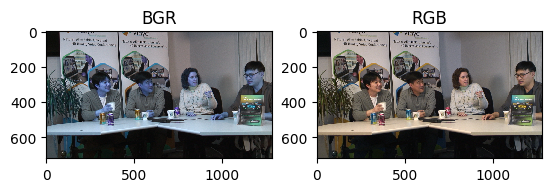

In [28]:
yuv_image = np.fromfile(raw_file, dtype=np.uint8)
yuv_image = yuv_image.reshape((height * 3 // 2, width))

bgr_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR_I420)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('BGR');plt1.imshow(bgr_image, interpolation='nearest')
plt2.set_title('RGB');plt2.imshow(rgb_image, interpolation='nearest')

### Step 5: Display GrayScale Image
> In this step we will modify YUV to make the image grayscale in the BGR domain.

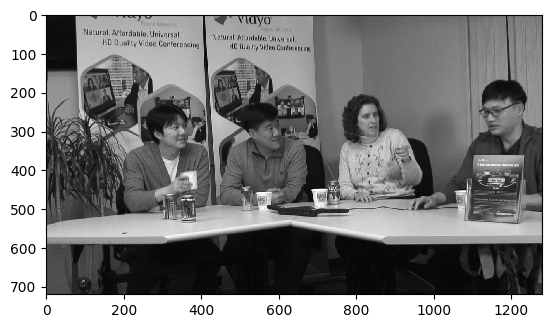

In [29]:
yuv_gray = yuv_image.copy()
yuv_gray[height:][:] = 128

gray_image = cv2.cvtColor(yuv_gray, cv2.COLOR_YUV2BGR_I420)
plt.imshow(gray_image, interpolation='nearest')

### Step 6: Display Flipped Image
> In this step we will modify YUV to make the image flipped in the BGR domain.

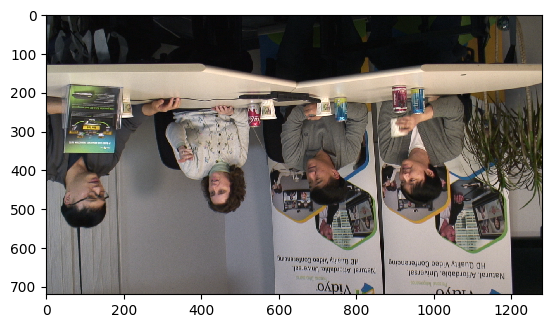

In [33]:
yuv_flipped = yuv_image.copy()
y_flipped = np.flip(np.flip(yuv_flipped[:height][:], axis=0), axis=1)
u_flipped = np.flip(np.flip(yuv_flipped[height:int(height * 1.25)][:], axis=0), axis=1)
v_flipped = np.flip(np.flip(yuv_flipped[int(height * 1.25):][:], axis=0), axis=1)
yuv_flipped = np.vstack([y_flipped, u_flipped, v_flipped])
flip_bgr_image = cv2.cvtColor(yuv_flipped, cv2.COLOR_YUV2BGRA_I420)
flip_rgb_image = cv2.cvtColor(flip_bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(flip_rgb_image, interpolation='nearest')

## Video
Video

### Step 1: Read a Video Config File.
>In this step we will read an video config file from `video.yaml`.

In [10]:
with open('video.yaml', 'r') as f:
  cfg = yaml.safe_load(f)

raw_file, width, height, fp = cfg['InputFile'], cfg['Width'], cfg['Height'], cfg['FrameRate']
f = open(raw_file, 'rb')
file_size = os.path.getsize(raw_file)
n_frames = file_size // (width * height * 3 // 2)

### Read a Video

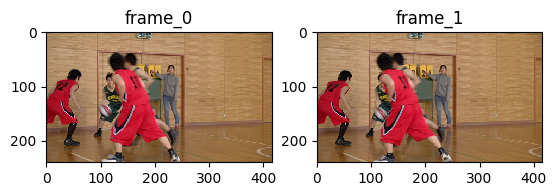

In [11]:
rgb_list = []
for i in range(n_frames):
  yuv_video = np.frombuffer(f.read(width * height * 3 // 2), dtype=np.uint8)
  yuv_video = yuv_video.reshape((int(height * 3 / 2), width))
  bgr_video = cv2.cvtColor(yuv_video, cv2.COLOR_YUV2BGR_I420)
  rgb_video = cv2.cvtColor(bgr_video, cv2.COLOR_BGR2RGB)
  rgb_list.append(rgb_video)

f, (plt1, plt2) = plt.subplots(1, 2)
plt1.set_title('frame_0');plt1.imshow(rgb_list[0], interpolation='nearest')
plt2.set_title('frame_1');plt2.imshow(rgb_list[1], interpolation='nearest')